In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XES_functions import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
runlist = np.arange(790,795,1)
#runlist = [790, 791, 792]
Loaddir = '../Claudio/Reduced_TT//'
##############################################3
print ('Will load {} runs: {} from {}'.format(len(runlist), runlist, Loaddir))

Will load 5 runs: [790 791 792 793 794] from ../Claudio/Reduced_TT//


## check data files

In [3]:
from itertools import chain
datafiles = []
for run in runlist:
    file = glob(Loaddir + '/*{:04d}*/*spectrum*'.format(run))
    datafiles.append(file)
datafiles = itertools.chain.from_iterable(datafiles)
datafiles = sorted(datafiles, key = os.path.getmtime)
print ('{} files found'.format(len(datafiles)))
datafiles

40 files found


['../Claudio/Reduced_TT/run0790-FebpyCN4_DMA_7uJ_short_001/spectrum_roi1_ON.npy',
 '../Claudio/Reduced_TT/run0790-FebpyCN4_DMA_7uJ_short_001/spectrum_roi2_ON.npy',
 '../Claudio/Reduced_TT/run0790-FebpyCN4_DMA_7uJ_short_001/spectrum_roi3_ON.npy',
 '../Claudio/Reduced_TT/run0790-FebpyCN4_DMA_7uJ_short_001/spectrum_roi4_ON.npy',
 '../Claudio/Reduced_TT/run0790-FebpyCN4_DMA_7uJ_short_001/spectrum_roi1_OFF.npy',
 '../Claudio/Reduced_TT/run0790-FebpyCN4_DMA_7uJ_short_001/spectrum_roi2_OFF.npy',
 '../Claudio/Reduced_TT/run0790-FebpyCN4_DMA_7uJ_short_001/spectrum_roi3_OFF.npy',
 '../Claudio/Reduced_TT/run0790-FebpyCN4_DMA_7uJ_short_001/spectrum_roi4_OFF.npy',
 '../Claudio/Reduced_TT/run0791-FebpyCN4_DMA_7uJ_short_002/spectrum_roi1_ON.npy',
 '../Claudio/Reduced_TT/run0791-FebpyCN4_DMA_7uJ_short_002/spectrum_roi2_ON.npy',
 '../Claudio/Reduced_TT/run0791-FebpyCN4_DMA_7uJ_short_002/spectrum_roi3_ON.npy',
 '../Claudio/Reduced_TT/run0791-FebpyCN4_DMA_7uJ_short_002/spectrum_roi4_ON.npy',
 '../Claudio

# Plotting timescans WITHOUT timetool
## (for TT correction go below)

In [4]:
roi_array = ['spectrum_roi1_ON', 'spectrum_roi1_OFF', 
             'spectrum_roi2_ON', 'spectrum_roi2_OFF',
             'spectrum_roi3_ON', 'spectrum_roi3_OFF',
             'spectrum_roi4_ON', 'spectrum_roi4_OFF',]

for spec in roi_array:
    datafiles = []
    for run in runlist:
        file = glob(Loaddir + '/*{:04d}*/{}.npy'.format(run,spec))
        datafiles.append(file)
    datafiles = itertools.chain.from_iterable(datafiles)
    datafiles = sorted(datafiles, key = os.path.getmtime)
    patch = datafiles
    print (len(patch))
    #print (patch)
    spec2save = []
    for ff in patch:
        temp = np.load(ff, allow_pickle=True)
        spectrum_temp = []
        for index in range(len(temp)):
            spectrum_temp.append(np.average(temp[index], axis =0))
        #spec2save = (spec2save + np.asarray(spectrum_temp))
        spec2save.append(spectrum_temp)
    spec2save = np.average(spec2save, axis=0)
    print (np.shape(spec2save))
    np.save(Loaddir+spec+'_all.npy', spec2save)

5
(41, 120)
5
(41, 120)
5
(41, 120)
5
(41, 120)
5
(41, 140)
5
(41, 140)
5
(41, 140)
5
(41, 140)


In [5]:
spectrum_roi1_ON = np.load(Loaddir+'/spectrum_roi1_ON_all.npy')
spectrum_roi1_OFF = np.load(Loaddir+'/spectrum_roi1_OFF_all.npy')
spectrum_roi2_ON = np.load(Loaddir+'/spectrum_roi2_ON_all.npy')
spectrum_roi2_OFF = np.load(Loaddir+'/spectrum_roi2_OFF_all.npy')
spectrum_roi3_ON = np.load(Loaddir+'/spectrum_roi3_ON_all.npy')
spectrum_roi3_OFF = np.load(Loaddir+'/spectrum_roi3_OFF_all.npy')
spectrum_roi4_ON = np.load(Loaddir+'/spectrum_roi4_ON_all.npy')
spectrum_roi4_OFF = np.load(Loaddir+'/spectrum_roi4_OFF_all.npy')

120 140


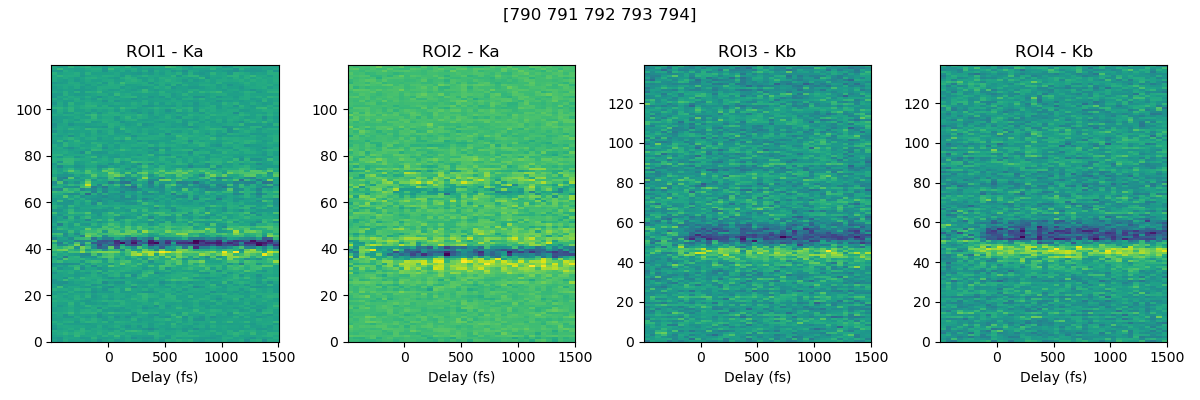

In [6]:
xaxis12 = np.arange(0,len(np.load(Loaddir+'/spectrum_roi1_ON_all.npy')[0]))
xaxis34 = np.arange(0,len(np.load(Loaddir+'/spectrum_roi3_ON_all.npy')[0]))
print (len(xaxis12), len(xaxis34))

Delay_fs = np.load(glob(Loaddir+'/*{:04d}*/Delay_readbacks.npy'.format(runlist[0]))[0])

plt.figure(figsize=(12,4))
plt.suptitle(str(runlist))
plt.subplot(141)
plt.title('ROI1 - Ka')
plt.pcolormesh(Delay_fs, xaxis12, np.transpose(spectrum_roi1_ON-np.average(spectrum_roi1_OFF,axis=0)))
plt.xlabel('Delay (fs)')

plt.subplot(142)
plt.title('ROI2 - Ka')
plt.pcolormesh(Delay_fs, xaxis12, np.transpose(spectrum_roi2_ON-np.average(spectrum_roi2_OFF,axis=0)))
plt.xlabel('Delay (fs)')

plt.subplot(143)
plt.title('ROI3 - Kb')
plt.pcolormesh(Delay_fs, xaxis34, np.transpose(spectrum_roi3_ON-np.average(spectrum_roi3_OFF,axis=0)))
plt.xlabel('Delay (fs)')

plt.subplot(144)
plt.title('ROI4 - Kb')
plt.pcolormesh(Delay_fs, xaxis34, np.transpose(spectrum_roi4_ON-np.average(spectrum_roi4_OFF,axis=0)))
plt.xlabel('Delay (fs)')

plt.tight_layout()
plt.show()

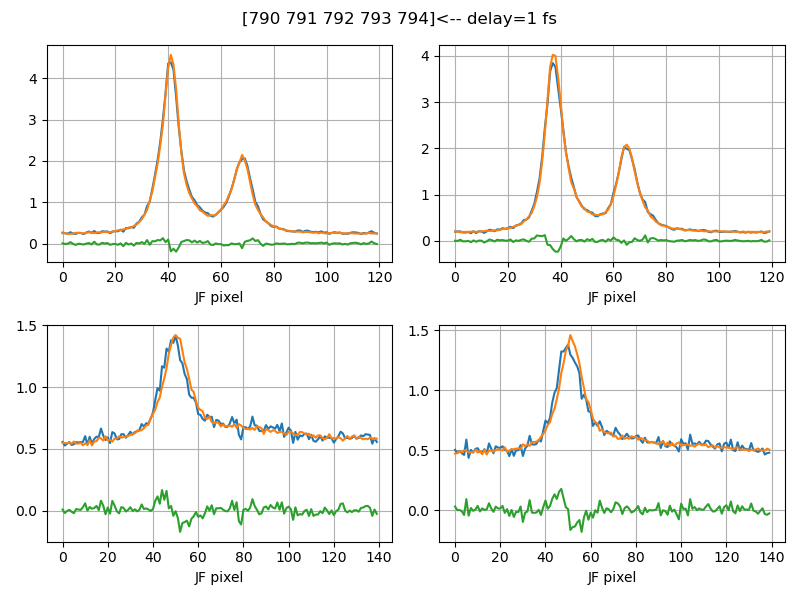

In [7]:
index2plot = 10

#############################################3

specON_array = [spectrum_roi1_ON, spectrum_roi2_ON, spectrum_roi3_ON, spectrum_roi4_ON]
specOFF_array = [spectrum_roi1_OFF, spectrum_roi2_OFF, spectrum_roi3_OFF, spectrum_roi4_OFF]

fig = plt.figure(figsize=(8, 6))
plt.suptitle(str(runlist)+'<-- delay={:.0f} fs'.format(Delay_fs[index2plot]))

for i in range(4):
    location = 221+i  # this is to index the position of the subplot
    ax = plt.subplot(location)
    ax.plot(specON_array[i][index2plot])
    ax.plot(np.average(specOFF_array[i],axis=0))
    ax.plot(specON_array[i][index2plot]-np.average(specOFF_array[i], axis=0))
    plt.grid()
    plt.xlabel('JF pixel')

plt.tight_layout()

In [8]:
data = []
for f in glob(Loaddir+'/spectrum_*'):
    data.append(f)
    data = sorted(data, key = os.path.getmtime)
print (data)
intensity_all=[]
for index in np.arange(0,8,2):
    intensity = []
    map_2D = np.transpose(np.load(data[index])-np.average(np.load(data[index+1]),axis=0))
    for index in np.arange(len(Delay_fs)):
        intensity.append(np.sum(np.abs(map_2D[40:65,index]), axis = 0))
    intensity_all.append(intensity)

['../Claudio/Reduced_TT/spectrum_roi1_ON_all.npy', '../Claudio/Reduced_TT/spectrum_roi1_OFF_all.npy', '../Claudio/Reduced_TT/spectrum_roi2_ON_all.npy', '../Claudio/Reduced_TT/spectrum_roi2_OFF_all.npy', '../Claudio/Reduced_TT/spectrum_roi3_ON_all.npy', '../Claudio/Reduced_TT/spectrum_roi3_OFF_all.npy', '../Claudio/Reduced_TT/spectrum_roi4_ON_all.npy', '../Claudio/Reduced_TT/spectrum_roi4_OFF_all.npy']


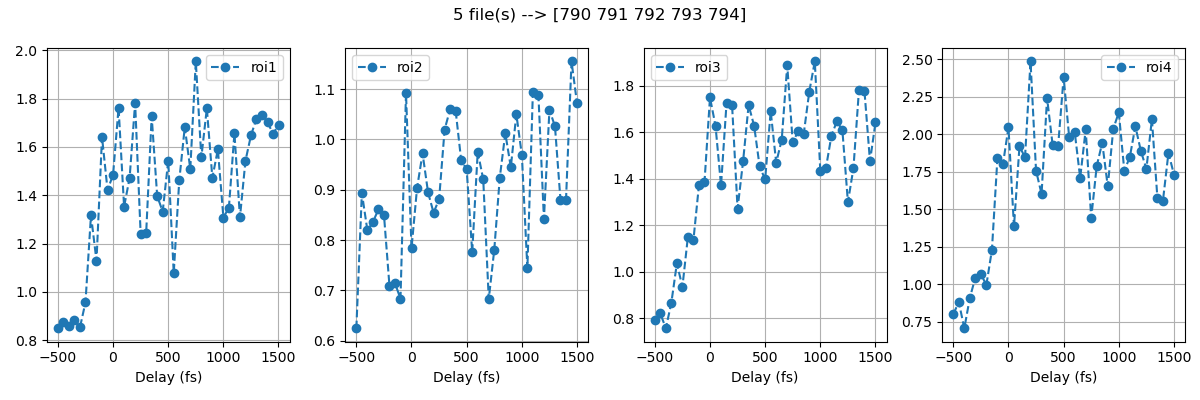

In [9]:
plt.figure(figsize=(12,4))
plt.suptitle('{} file(s) --> {}'.format(len(runlist),str(runlist)))

plt.subplot(141)
plt.plot(Delay_fs, intensity_all[0], '--o', label='roi1')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Delay (fs)')


plt.subplot(142)
plt.plot(Delay_fs, intensity_all[1],'--o', label='roi2')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Delay (fs)')


plt.subplot(143)
plt.plot(Delay_fs, intensity_all[2],'--o',  label='roi3')
plt.legend(loc='best')
plt.grid()
plt.xlabel('Delay (fs)')

plt.subplot(144)
plt.plot(Delay_fs, intensity_all[3],'--o', label='roi4')
plt.legend(loc='best')
plt.grid()
plt.xlabel('Delay (fs)')

plt.tight_layout()
plt.show()

In [10]:
# err function ---------------> [x0, amplitude, width, offset]
# exp_gauss_heaviside --------> [x0, amplitude, width, offset, lifetime]
# conv_exp_gauss_heaviside2 --> [x0, amplitude, width, offset, lifetime, a, b]

fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
#fit = Fit(conv_exp_gauss_heaviside, estimate_conv_exp_gauss_heaviside_parameters) 
#fit = Fit(conv_exp_gauss_heaviside2, estimate_conv_exp_gauss_heaviside2_parameters)

In [11]:
intensity = np.array(intensity_all[3])

fit.estimate(Delay_fs, intensity)            # this sets some internal params 
#print(fit.p0)
#fit.p0 = better_p0(fit.p0, 4, 250) # overwrite some values (index) if needed: 
#fit.p0 =[272.1, 0.08, 100, 0.01, 200, 0, 0.05]

fit.fit(Delay_fs,intensity)                  # calculate the fit
pp_fit = fit.eval(Delay_fs)           # evaluate the curve for plotting

#t0_fs = fit.popt[0]
#t0_mm = timezero_mm + fs2mm(t0_fs, 0)
width_fs = fit.popt[2]

print("Width ={:.2f}".format(np.abs(width_fs),"fs"))

Width =59.27


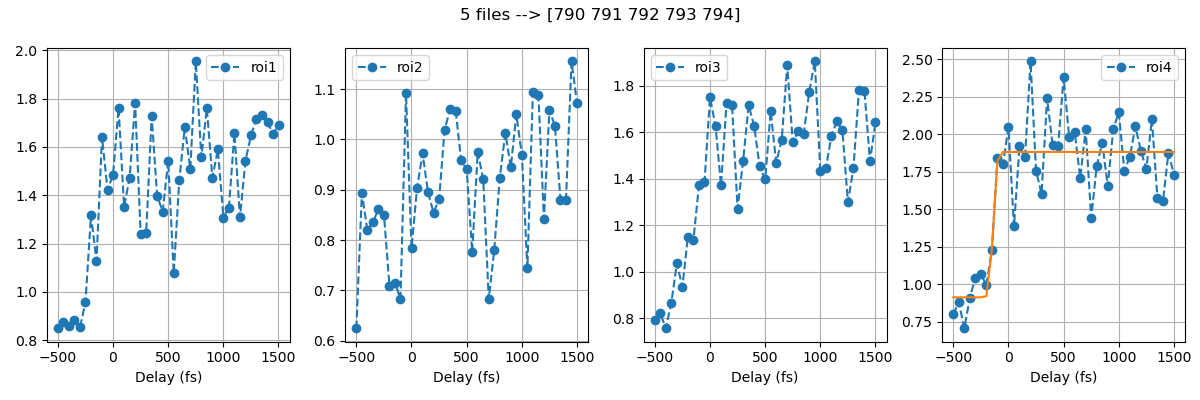

In [12]:
plt.figure(figsize=(12,4))
plt.suptitle('{} files --> {}'.format(len(runlist),str(runlist)))

plt.subplot(141)
plt.plot(Delay_fs, intensity_all[0], '--o', label='roi1')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Delay (fs)')


plt.subplot(142)
plt.plot(Delay_fs, intensity_all[1],'--o', label='roi2')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Delay (fs)')


plt.subplot(143)
plt.plot(Delay_fs, intensity_all[2],'--o',  label='roi3')
plt.legend(loc='best')
plt.grid()
plt.xlabel('Delay (fs)')

plt.subplot(144)
plt.plot(Delay_fs, intensity_all[3],'--o', label='roi4')
plt.plot(Delay_fs, pp_fit)

plt.legend(loc='best')
plt.grid()
plt.xlabel('Delay (fs)')
plt.tight_layout()
plt.show()

# Plotting timescans WITH timetool

In [13]:
runlist

array([790, 791, 792, 793, 794])

In [14]:
roi_array = ['spectrum_roi1_ON', 'spectrum_roi1_OFF', 
             'spectrum_roi2_ON', 'spectrum_roi2_OFF',
             'spectrum_roi3_ON', 'spectrum_roi3_OFF',
             'spectrum_roi4_ON', 'spectrum_roi4_OFF',]

for spec in roi_array:
    datafiles = []
    for run in runlist:
        file = glob(Loaddir + '/*{:04d}*/{}.npy'.format(run,spec))
        datafiles.append(file)
    datafiles = itertools.chain.from_iterable(datafiles)
    datafiles = sorted(datafiles, key = os.path.getmtime)
    patch = datafiles
    print (len(patch))
    #print (patch)
    #### Load ON/OFF the spectra for different runs and save them #####
    spec2save = []
    for ff in patch:
        temp = np.load(ff, allow_pickle=True)
        temp = np.asarray(list(itertools.chain.from_iterable(temp)))
        spec2save.append(temp)
    spec2save = np.asarray(list(itertools.chain.from_iterable(spec2save)))
    print (np.shape(spec2save))
    np.save(Loaddir+spec+'_all.npy', spec2save)
    
delayfiles = []
for run in runlist:
    delayfile = glob(Loaddir + '/*{:04d}*/*delays_corr*'.format(run))
    delayfiles.append(delayfile)
delayfiles = itertools.chain.from_iterable(delayfiles)
delayfiles = sorted(delayfiles, key = os.path.getmtime)
print ('{} file(s) found.'.format(len(delayfiles)))
delay2save = []
for df in delayfiles:
    temp = np.load(df, allow_pickle=True)
    delay2save.append(temp)
delay2save = np.asarray(list(itertools.chain.from_iterable(delay2save)))
print (np.shape(delay2save))
np.save(Loaddir+'delays_all_TT.npy', delay2save)

5
(175798, 120)
5
(29299, 120)
5
(175798, 120)
5
(29299, 120)
5
(175798, 140)
5
(29299, 140)
5
(175798, 140)
5
(29299, 140)
5 file(s) found.
(175798,)


In [15]:
binsize = 50
offset = 10

roi1 = (5050, 5170, 135, 205) #signal CRY2 low
roi2 = (5050, 5170, 315, 365) #signan CRY2 up

roi3 = (8400, 8540, 155, 215) #signal CRY1 low
roi4 = (8400, 8540, 295, 345) #signal CRY1 up


Delay_fs_scan = np.load(glob(Loaddir+'/*{:04d}*/delays_stage.npy'.format(runlist[0]))[0])
#Delay_fs_scan = Delay_fs_scan
binList = np.arange(Delay_fs_scan[0] - offset, Delay_fs_scan[-1] + offset, binsize)
#binList = Delay_fs_scan
bin_centres = (binList[:-1] + binList[1:])/2
Delay_fs_TT = np.arange(Delay_fs_scan[0] - offset + binsize/2, Delay_fs_scan[-1] + offset - binsize/2, binsize)

spectrum_roi1_ON = np.load(Loaddir+'/spectrum_roi1_ON_all.npy')
spectrum_roi1_OFF = np.load(Loaddir+'/spectrum_roi1_OFF_all.npy')
spectrum_roi2_ON = np.load(Loaddir+'/spectrum_roi2_ON_all.npy')
spectrum_roi2_OFF = np.load(Loaddir+'/spectrum_roi2_OFF_all.npy')
spectrum_roi3_ON = np.load(Loaddir+'/spectrum_roi3_ON_all.npy')
spectrum_roi3_OFF = np.load(Loaddir+'/spectrum_roi3_OFF_all.npy')
spectrum_roi4_ON = np.load(Loaddir+'/spectrum_roi4_ON_all.npy')
spectrum_roi4_OFF = np.load(Loaddir+'/spectrum_roi4_OFF_all.npy')
Delays_corr_scan = np.load(Loaddir+'/delays_all_TT.npy')

print (np.shape(spectrum_roi1_ON))
print (np.shape(Delays_corr_scan))


#Delay_rebin = np.zeros(len(bin_centres))
spectrum_roi1_on_rebin = np.zeros((len(bin_centres), np.shape(spectrum_roi1_ON)[1]))
spectrum_roi2_on_rebin = np.zeros((len(bin_centres), np.shape(spectrum_roi2_ON)[1]))
spectrum_roi3_on_rebin = np.zeros((len(bin_centres), np.shape(spectrum_roi3_ON)[1]))
spectrum_roi4_on_rebin = np.zeros((len(bin_centres), np.shape(spectrum_roi4_ON)[1]))
check=[]
for i in range(len(bin_centres)):
    cond1 = Delays_corr_scan > binList[i]
    cond2 = Delays_corr_scan < binList[i+1]

    idx = np.where(cond1*cond2)[0]
    check.append(idx)
    #print (len(idx))

    Delay_fs_TT[i] = np.average(Delays_corr_scan[idx])
    
    spectrum_roi1_on_rebin[i] = np.average(spectrum_roi1_ON[idx,:], axis=0)
    spectrum_roi2_on_rebin[i] = np.average(spectrum_roi2_ON[idx,:], axis=0)
    spectrum_roi3_on_rebin[i] = np.average(spectrum_roi3_ON[idx,:], axis=0)
    spectrum_roi4_on_rebin[i] = np.average(spectrum_roi4_ON[idx,:], axis=0)
check = np.asarray(list(itertools.chain.from_iterable(check)))
print (len(check))

(175798, 120)
(175798,)
167834


In [16]:
map2D_roi1_rebin = np.transpose(spectrum_roi1_on_rebin-np.average(spectrum_roi1_OFF,axis=0))
map2D_roi2_rebin = np.transpose(spectrum_roi2_on_rebin-np.average(spectrum_roi2_OFF,axis=0))
map2D_roi3_rebin = np.transpose(spectrum_roi3_on_rebin-np.average(spectrum_roi3_OFF,axis=0))
map2D_roi4_rebin = np.transpose(spectrum_roi4_on_rebin-np.average(spectrum_roi4_OFF,axis=0))
np.save(Loaddir+'map2D_roi1_rebin.npy', map2D_roi1_rebin)
np.save(Loaddir+'map2D_roi2_rebin.npy', map2D_roi2_rebin)
np.save(Loaddir+'map2D_roi3_rebin.npy', map2D_roi3_rebin)
np.save(Loaddir+'map2D_roi4_rebin.npy', map2D_roi4_rebin)

120 140


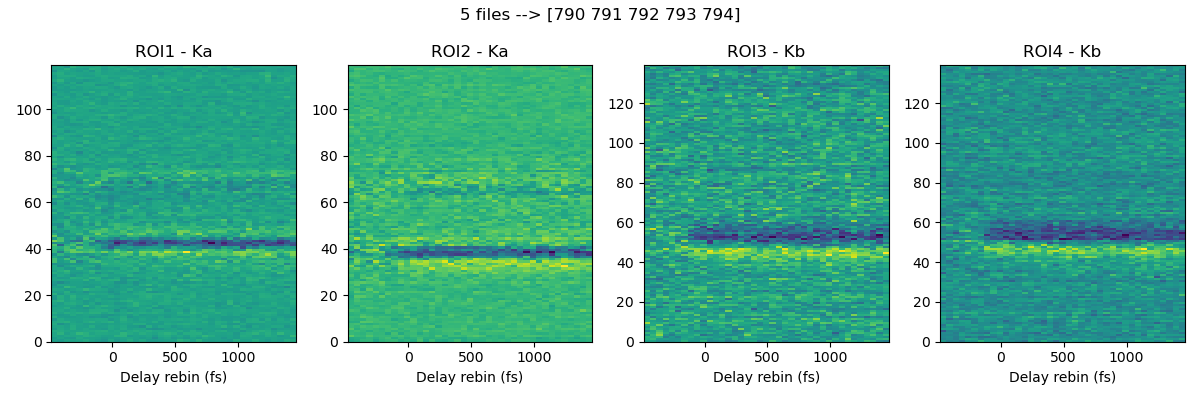

In [17]:
xaxis12 = np.arange(0,np.shape(spectrum_roi1_ON)[1])
xaxis34 = np.arange(0,np.shape(spectrum_roi3_ON)[1])
print (len(xaxis12), len(xaxis34))
#Delay_fs = np.load(Loaddir+'/run0790-FebpyCN4_DMA_7uJ_short_001/delays_fs.npy')
#Delay_fs = np.load(glob(Loaddir+'/*{:04d}*/delays_fs.npy'.format(runlist[0]))[0])

plt.figure(figsize=(12,4))
plt.suptitle('{} files --> {}'.format(len(runlist),str(runlist)))
plt.subplot(141)
plt.title('ROI1 - Ka')
plt.pcolormesh(Delay_fs_TT, xaxis12, map2D_roi1_rebin)
plt.xlabel('Delay rebin (fs)')

plt.subplot(142)
plt.title('ROI2 - Ka')
plt.pcolormesh(Delay_fs_TT, xaxis12, map2D_roi2_rebin)
plt.xlabel('Delay rebin (fs)')

plt.subplot(143)
plt.title('ROI3 - Kb')
plt.pcolormesh(Delay_fs_TT, xaxis34, map2D_roi3_rebin)
plt.xlabel('Delay rebin (fs)')

plt.subplot(144)
plt.title('ROI4 - Kb')
plt.pcolormesh(Delay_fs_TT, xaxis34, map2D_roi4_rebin)
plt.xlabel('Delay rebin (fs)')

plt.tight_layout()
plt.show()

In [18]:
data = []
for f in glob(Loaddir+'*rebin*'):
    data.append(f)
    data = sorted(data, key = os.path.getmtime)
print (data)
intensity_all_TT=[]
for index in np.arange(len(data)):
    map_2D = np.load(data[index])
    print (np.shape(map_2D))
    intensity = []
    for delayindex in np.arange(len(Delay_fs_TT)):
        intensity.append(np.sum(np.abs(map_2D[40:65,delayindex]), axis = 0))
    intensity_all_TT.append(intensity)

['../Claudio/Reduced_TT/map2D_roi1_rebin.npy', '../Claudio/Reduced_TT/map2D_roi2_rebin.npy', '../Claudio/Reduced_TT/map2D_roi3_rebin.npy', '../Claudio/Reduced_TT/map2D_roi4_rebin.npy']
(120, 40)
(120, 40)
(140, 40)
(140, 40)


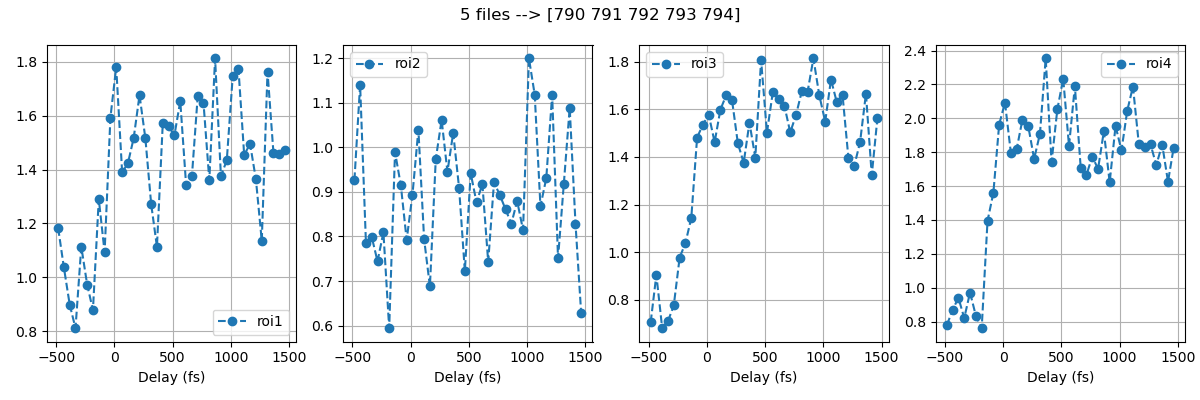

In [19]:
plt.figure(figsize=(12,4))
plt.suptitle('{} files --> {}'.format(len(runlist),str(runlist)))

plt.subplot(141)
plt.plot(Delay_fs_TT, intensity_all_TT[0], '--o', label='roi1')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Delay (fs)')

plt.subplot(142)
plt.plot(Delay_fs_TT, intensity_all_TT[1],'--o', label='roi2')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Delay (fs)')


plt.subplot(143)
plt.plot(Delay_fs_TT, intensity_all_TT[2],'--o',  label='roi3')
plt.legend(loc='best')
plt.grid()
plt.xlabel('Delay (fs)')

plt.subplot(144)
plt.plot(Delay_fs_TT, intensity_all_TT[3],'--o', label='roi4')
#plt.plot(Delay_fs, intensity_all[3],'--o', label='roi4')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Delay (fs)')
plt.tight_layout()
plt.show()

In [20]:
# err function ---------------> [x0, amplitude, width, offset]
# exp_gauss_heaviside --------> [x0, amplitude, width, offset, lifetime]
# conv_exp_gauss_heaviside2 --> [x0, amplitude, width, offset, lifetime, a, b]

fit = Fit(errfunc_fwhm, estimate_errfunc_parameters)
#fit = Fit(conv_exp_gauss_heaviside, estimate_conv_exp_gauss_heaviside_parameters) 
#fit = Fit(conv_exp_gauss_heaviside2, estimate_conv_exp_gauss_heaviside2_parameters)

In [21]:
intensity = np.array(intensity_all_TT[3])

fit.estimate(Delay_fs_TT, intensity)            # this sets some internal params 
#print(fit.p0)
#fit.p0 = better_p0(fit.p0, 4, 250) # overwrite some values (index) if needed: 
#fit.p0 =[272.1, 0.08, 100, 0.01, 200, 0, 0.05]

fit.fit(Delay_fs_TT,intensity)                  # calculate the fit
pp_fit = fit.eval(Delay_fs_TT)           # evaluate the curve for plotting

#t0_fs = fit.popt[0]
#t0_mm = timezero_mm + fs2mm(t0_fs, 0)
width_fs = fit.popt[2]

print("Width ={:.2f}".format(np.abs(width_fs),"fs"))

Width =101.98


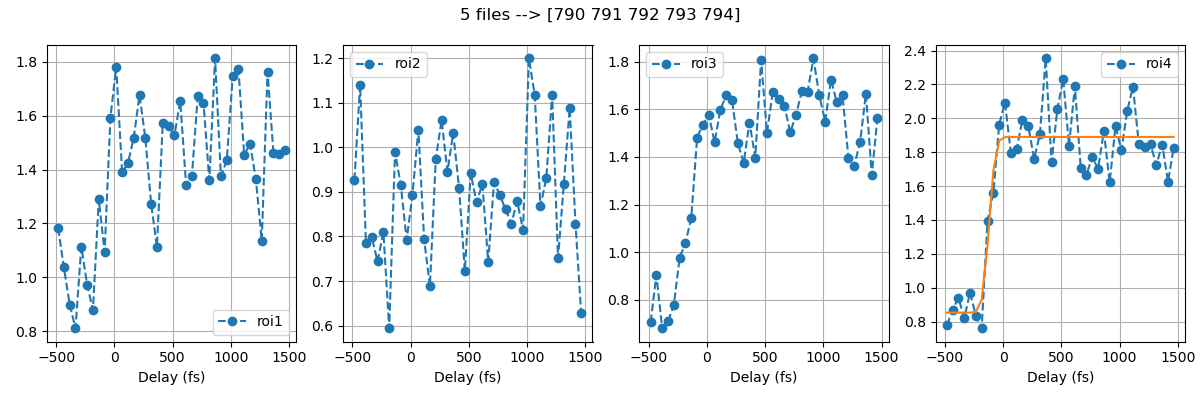

In [22]:
plt.figure(figsize=(12,4))
plt.suptitle('{} files --> {}'.format(len(runlist),str(runlist)))

plt.subplot(141)
plt.plot(Delay_fs_TT, intensity_all_TT[0], '--o', label='roi1')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Delay (fs)')

plt.subplot(142)
plt.plot(Delay_fs_TT, intensity_all_TT[1],'--o', label='roi2')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Delay (fs)')


plt.subplot(143)
plt.plot(Delay_fs_TT, intensity_all_TT[2],'--o',  label='roi3')
plt.legend(loc='best')
plt.grid()
plt.xlabel('Delay (fs)')

plt.subplot(144)
#plt.plot(Delay_fs, intensity_all[3],'--o', label='roi4')
plt.plot(Delay_fs_TT, intensity_all_TT[3],'--o', label='roi4')
plt.plot(Delay_fs_TT, pp_fit)

plt.legend(loc='best')
plt.grid()
plt.xlabel('Delay (fs)')
plt.tight_layout()
plt.show()